In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [257]:
dataset = pd.read_csv('student_scores.csv')

In [115]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [116]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0.5, 1.0, 'Hours vs Percentage')

Text(0.5, 0, 'Hours Studied')

Text(0, 0.5, 'Percentage Score')

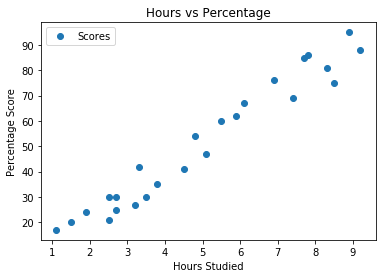

In [117]:
dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()  

#### Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [258]:
x = dataset['Hours']

X = dataset[['Hours']]
y = dataset['Scores']

In [259]:
X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [127]:
regressor.intercept_

2.018160041434662

In [128]:
regressor.coef_

array([9.91065648])

#### This means that for every one unit of change in hours studied, the change in the score is about 9.91%. Or in simpler words, if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously.

In [260]:
# predicting test data
yfit = model.predict(X_test)

In [261]:
yfit

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

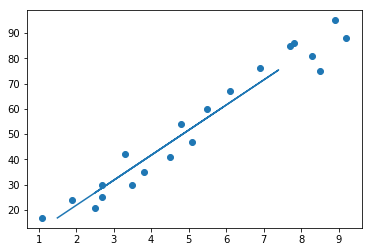

In [133]:
plt.scatter(X_train, y_train)
plt.plot(X_test, yfit)

In [67]:
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})

In [68]:
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


#### The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

In [69]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


## Model validation by checking if predicted values of train data matches score values of train data

### To jest to samo, co robione jest w przypadku rowerów i pogody poniżej. Sprawdzenie czy model pasuje 'sam do siebie', tzn. na podstawie danych czy wyliczony output jest równy prawdziwemu outputowi treningowemu i sprawdzenie statystycznych prawdopodonienstw (tu tego nie robie, ale po to sie to robi) czy dane wartosci maja wplyw na output i w jakim stopniu.

### statistical modeling framework, in which the parameters of the model are assumed to have interpretable meaning.

In [262]:
# predicting if data which was used to train matches y which was used to train
yfit2 = model.predict(X_train)

In [263]:
yfit2

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217,
       52.56250809, 78.33021494, 34.72332643, 84.27660883, 93.19619966,
       62.47316457, 36.70545772, 28.77693254, 56.52677068, 28.77693254,
       86.25874013, 26.79480124, 49.58931115, 90.22300272, 46.6161142 ])

In [264]:
training_validation = pd.DataFrame({'Actual' : y_train, 'Predicted' : yfit2})

In [265]:
training_validation

,Actual,Predicted
22,35,39.678655
17,24,20.848407
24,86,79.321281
23,76,70.401690
14,17,12.919882
1,47,52.562508
10,85,78.330215
13,42,34.723326
8,81,84.276609
6,88,93.196200


## Multiple regression

In [81]:
dataset = pd.read_csv('petrol.txt', sep='\s+')

In [85]:
dataset.drop(columns=['Index', 'One'], inplace=True)
dataset.head()

,Petrol_tax_(cents_per_gallon),Average_income_(dollars),Paved_Highways_(miles),Proportion_of_population_with_drivers_licenses,Consumption_of_petrol_(millions_of_gallons)
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [88]:
dataset.describe()

,Petrol_tax_(cents_per_gallon),Average_income_(dollars),Paved_Highways_(miles),Proportion_of_population_with_drivers_licenses,Consumption_of_petrol_(millions_of_gallons)
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [89]:
dataset.columns

Index(['Petrol_tax_(cents_per_gallon)', 'Average_income_(dollars)',
       'Paved_Highways_(miles)',
       'Proportion_of_population_with_drivers_licenses',
       'Consumption_of_petrol_(millions_of_gallons)'],
      dtype='object')

In [98]:
X = dataset[['Petrol_tax_(cents_per_gallon)', 'Average_income_(dollars)', 'Paved_Highways_(miles)', 'Proportion_of_population_with_drivers_licenses']]
y = dataset['Consumption_of_petrol_(millions_of_gallons)']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [100]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [101]:
regressor.intercept_

425.59933220324206

In [104]:
regressor.coef_

array([-4.00166602e+01, -6.54126674e-02, -4.74073380e-03,  1.34186212e+03])

In [106]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient aka Slope'])  
coeff_df  

,Coefficient aka Slope
Petrol_tax_(cents_per_gallon),-40.016660
Average_income_(dollars),-0.065413
Paved_Highways_(miles),-0.004741
Proportion_of_population_with_drivers_licenses,1341.862121


In [108]:
y_pred = regressor.predict(X_test)

In [109]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df  

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [110]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 56.8222474789647
Mean Squared Error: 4666.344787588362
Root Mean Squared Error: 68.31064915215168


# Example: Predicting Bicycle Traffic


In [218]:
counts = pd.read_csv('Fremont_Bridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('BicycleWeather.csv', index_col='DATE', parse_dates=True)

In [219]:
counts.columns = ['East', 'West']
counts.head()

,East,West
Date,,
2019-02-28 23:00:00,5.0,6.0
2019-02-28 22:00:00,4.0,27.0
2019-02-28 21:00:00,16.0,32.0
2019-02-28 20:00:00,16.0,50.0
2019-02-28 19:00:00,39.0,59.0


In [220]:
daily = counts.resample('d').sum()

In [221]:
daily.head()

,East,West
Date,,
2012-10-03,1760.0,1761.0
2012-10-04,1708.0,1767.0
2012-10-05,1558.0,1590.0
2012-10-06,1080.0,926.0
2012-10-07,1191.0,951.0


In [222]:
daily['Total'] = daily.sum(axis=1)  #axis='columns'

In [223]:
daily.head()

,East,West,Total
Date,,,
2012-10-03,1760.0,1761.0,3521.0
2012-10-04,1708.0,1767.0,3475.0
2012-10-05,1558.0,1590.0,3148.0
2012-10-06,1080.0,926.0,2006.0
2012-10-07,1191.0,951.0,2142.0


In [224]:
daily = daily[['Total']]

In [225]:
daily.head()

,Total
Date,
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0
2012-10-07,2142.0


In [226]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [227]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [228]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()

In [229]:
holidays = cal.holidays('2012', '2016')

In [230]:
holidays

DatetimeIndex(['2012-01-02', '2012-01-16', '2012-02-20', '2012-05-28',
               '2012-07-04', '2012-09-03', '2012-10-08', '2012-11-12',
               '2012-11-22', '2012-12-25', '2013-01-01', '2013-01-21',
               '2013-02-18', '2013-05-27', '2013-07-04', '2013-09-02',
               '2013-10-14', '2013-11-11', '2013-11-28', '2013-12-25',
               '2014-01-01', '2014-01-20', '2014-02-17', '2014-05-26',
               '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11',
               '2014-11-27', '2014-12-25', '2015-01-01', '2015-01-19',
               '2015-02-16', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25',
               '2016-01-01'],
              dtype='datetime64[ns]', freq=None)

In [231]:
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

In [232]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-08,3537.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2012-10-09,3501.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-10,3235.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-11,3047.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [233]:
pd.Series(1, index=holidays, name='holiday')

2012-01-02    1
2012-01-16    1
2012-02-20    1
2012-05-28    1
2012-07-04    1
2012-09-03    1
2012-10-08    1
2012-11-12    1
2012-11-22    1
2012-12-25    1
2013-01-01    1
2013-01-21    1
2013-02-18    1
2013-05-27    1
2013-07-04    1
2013-09-02    1
2013-10-14    1
2013-11-11    1
2013-11-28    1
2013-12-25    1
2014-01-01    1
2014-01-20    1
2014-02-17    1
2014-05-26    1
2014-07-04    1
2014-09-01    1
2014-10-13    1
2014-11-11    1
2014-11-27    1
2014-12-25    1
2015-01-01    1
2015-01-19    1
2015-02-16    1
2015-05-25    1
2015-07-03    1
2015-09-07    1
2015-10-12    1
2015-11-11    1
2015-11-26    1
2015-12-25    1
2016-01-01    1
Name: holiday, dtype: int64

In [234]:
cipa = [2, 4, 6, 8]
pd.Series(1, index=cipa, name='cipa')

2    1
4    1
6    1
8    1
Name: cipa, dtype: int64

(8, 17)

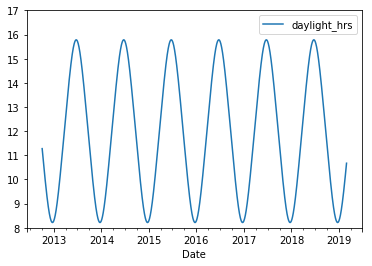

In [235]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

In [236]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs
Date,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208


In [237]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

In [238]:
# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

In [240]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [241]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0,0.010959


In [243]:
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

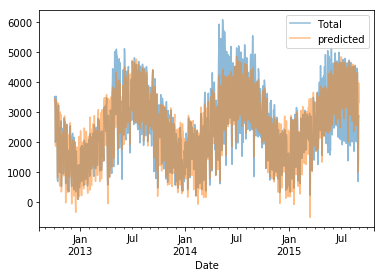

In [244]:
daily[['Total', 'predicted']].plot(alpha=0.5)